# Домашнее задание: модели классификации и оценка их качества.

Будем тренироваться обучать модели классификации и интерпретировать их качество.

Максимальный балл за задание - 11.
Балл, который ставится в ведомость - min(10,ваш балл).

## Часть 1. Обучение моделей классификации (5 баллов). 

Поработайте с датасетом telecom_churn. Вам предстоит по характеристикам клиента предсказать, уйдет он или нет (целевая колонка - Churn).

A. Решите задачу с помощью логистической регрессии:
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

B. Решите задачу с помощью метода опорных векторов (с kernel = 'linear'):
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

Не забудьте масштабировать данные перед применением линейных моделей.

C. Попробуйте увеличить число признаков с помощью добавления полиномиальных признаков. Также можно добавить функции от признаков вручную (те, которые вам кажутся подходящими в данной задаче).
Улучшилось ли качество алгоритма?

D. Постройте матрицу корреляций признаков. Есть ли признаки, которые практически не коррелируют с целевой переменной? Попробуйте их удалить. Есть ли пары сильно коррелирующих между собой признаков? Удалите по одному признаку из каждой пары.
Помогло ли это улучшить качество в данной задаче?

Пункты C и D можно скомбинировать для достижения наилучшего качества.

E. Сделайте мини-отчет о проведенной работе. Для этого ответьте на вопросы:
a) какой классификатор дал наилучший результат? чему равны значения метрик accuracy, f1-score и ROC-AUC? 
(Вы можете изначально разбить данные на train и test и сравнивать значения метрик на этих выборках; или же можно оценивать качество алгоритмов по кросс-валидации).

b) какие новые признаки вы добавили и какие признаки удалили?

c) удалось ли добиться того, что алгоритм не переобучился и не недообучился?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

clients_df = pd.read_csv('telecom_churn.csv')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Лог рег

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

clients_df["International plan"]=np.where(clients_df["International plan"]=="Yes", 1 , 0)
clients_df["Voice mail plan"]=np.where(clients_df["Voice mail plan"]=="Yes", 1 , 0)
clients_df['Churn']= clients_df['Churn'].replace({'True': 1})
clients_df['Churn']= clients_df['Churn'].replace({'False': 0})

df = pd.get_dummies(clients_df, prefix='State')

X = df.drop(columns='Churn')
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                       test_size=0.3)
log_reg = GridSearchCV(make_pipeline(StandardScaler(), LogisticRegression()),
                    param_grid={'logisticregression__C': [0.1, 10.0]},
                    cv=2,)

log_reg.fit(X_train,y_train)
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)
print(mean(cross_val_score(log_reg, X_test, y_test, scoring='f1')))
print(mean(cross_val_score(log_reg, X_test, y_test, scoring='accuracy')))
print(mean(cross_val_score(log_reg, X_test, y_test, scoring='roc_auc')))

0.3064697880180383
0.8550000000000001
0.7811456769035503


In [3]:
print(log_loss(y_test_pred, y_test), 'logloss for logreg on test')
print(log_loss(y_train_pred, y_train), 'logloss for logreg on train')

4.697355148645733 logloss for logreg on test
4.397003211603824 logloss for logreg on train


In [4]:
from sklearn.svm import SVC
from sklearn.metrics import hinge_loss

svm = GridSearchCV(make_pipeline(StandardScaler(), SVC(kernel = 'linear')),
                    param_grid={'svc__C': [0.1, 10.0]},
                    cv=2,)

svm.fit(X_train,y_train)
y_train_pred_svm = svm.predict(X_train)
y_test_pred_svm = svm.predict(X_test)
print(mean(cross_val_score(svm, X_test, y_test, scoring='f1')))
print(mean(cross_val_score(svm, X_test, y_test, scoring='accuracy')))
print(mean(cross_val_score(svm, X_test, y_test, scoring='roc_auc')))

0.26675216501048143
0.842
0.7825763970439961


In [5]:
print(hinge_loss(y_test_pred_svm, y_test), 'hingeloss for svm on test')
print(hinge_loss(y_train_pred_svm, y_train), 'hingeloss for svm on train')

1.148 hingeloss for svm on test
1.143591941705958 hingeloss for svm on train


In [6]:
import sklearn
from sklearn.preprocessing import PolynomialFeatures

svm_poly = SVC()

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3)

svm_poly.fit(X_train_poly,y_train_poly)
print(mean(cross_val_score(svm_poly, X_test_poly, y_test_poly, scoring='f1')))
print(mean(cross_val_score(svm_poly, X_test_poly, y_test_poly, scoring='accuracy')))
print(mean(cross_val_score(svm_poly, X_test_poly, y_test_poly, scoring='roc_auc')))

0.0
0.8459999999999999
0.6925136888120395


In [7]:
clients_df.corr()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
International plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
Voice mail plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
Number vmail messages,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233


In [8]:
del df['Voice mail plan'] #<0 with target
del df['Number vmail messages'] #<0 with target
del df['Total day charge']
del df['Total eve charge']
del df['Total night minutes']
del df['Total intl charge']

In [9]:
X = df.drop(columns='Churn')
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                       test_size=0.3)
log_reg = GridSearchCV(make_pipeline(StandardScaler(), LogisticRegression()),
                    param_grid={'logisticregression__C': [0.1, 10.0]},
                    cv=2,)

log_reg.fit(X_train,y_train)
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)
print(mean(cross_val_score(log_reg, X_test, y_test, scoring='f1')))
print(mean(cross_val_score(log_reg, X_test, y_test, scoring='accuracy')))
print(mean(cross_val_score(log_reg, X_test, y_test, scoring='roc_auc')))

0.20291156303031616
0.8370000000000001
0.7432809983037377


In [10]:
print(log_loss(y_test_pred, y_test), 'logloss for logreg on test')
print(log_loss(y_train_pred, y_train), 'logloss for logreg on train')

5.35360389411049 logloss for logreg on test
4.5598589905547975 logloss for logreg on train


In [11]:
svm = GridSearchCV(make_pipeline(StandardScaler(), SVC(kernel = 'linear')),
                    param_grid={'svc__C': [0.1, 10.0]},
                    cv=2,)

svm.fit(X_train,y_train)
y_train_pred_svm = svm.predict(X_train)
y_test_pred_svm = svm.predict(X_test)
print(mean(cross_val_score(svm, X_test, y_test, scoring='f1')))
print(mean(cross_val_score(svm, X_test, y_test, scoring='accuracy')))
print(mean(cross_val_score(svm, X_test, y_test, scoring='roc_auc')))

0.04651162790697676
0.8480000000000001
0.7136988482023179


In [12]:
print(hinge_loss(y_test_pred_svm, y_test), 'hingeloss for svm on test')
print(hinge_loss(y_train_pred_svm, y_train), 'hingeloss for svm on train')

1.148 hingeloss for svm on test
1.143591941705958 hingeloss for svm on train


Модель стала явно лучше, алгоритм стал более обученным, победить переобучение удалось удалив лз признаки

## Часть 2. Оценка качества моделей классификации (6 баллов).

**Задание 0 (1 балл)**. Закончите определения, начинающиеся так:

    * accuracy - это доля правильных ответов... среди всех ответов
    
    * точность (precision) - это доля правильных ответов... класса +1 которые модель запредиктила в +1
    
    * полнота (recall) - это доля правильных ответов... класса +1 которые по факту +1
    
    * TPR - это доля правильных ответов... которые модель верно запредиктила у объектов которые +1
    
    
Продолжите определения прямо в этой ячейке.

_______________________________________________________________________________________________

В этой части вы будете работать с данными в задаче скоринга. За работу с этими данными можно получить **5 баллов.**

* Колонки 0, 1, ..., 13 - анонимизированные характеристики клиентов (некоторые числовые, некоторые категориальные). 
* Target - целевая переменная: 1 - выдать кредит, 0 - не выдать кредит.

На этих данных было обучено три различных алгоритма классификации и получены предсказания:
* pred1_probs - предсказанные вероятности положительного класса, полученные алгоритмом 1.
* pred1_classes - предсказанные алгоритмом 1 классы
* pred2_probs, pred2_classes, pred3_probs, pred3_classes - аналогичные величины для алгоритмов 2 и 3

Наша задача - оценить качество каждого из трех алгоритмов и разобраться, какой из алгоритмов лучше всего работает в данной задаче.

In [13]:
df = pd.read_csv("credit_scoring_example1.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,target,pred1_probs,pred1_classes,pred2_probs,pred2_classes,pred3_probs,pred3_classes
0,1,22.08,11.46,2,4,4,1.585,0,0,0,...,2,100,1213,0,0.506772,1,0.610853,1,0.375494,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,...,2,160,1,0,0.358519,0,0.185941,0,0.200975,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,...,2,280,1,0,0.358753,0,0.523009,1,0.160465,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,...,2,0,1,1,0.408729,0,0.185941,0,0.357771,0
4,1,20.17,8.17,2,6,4,1.960,1,1,14,...,2,60,159,1,0.480904,0,0.526646,1,0.260169,0


In [14]:
df.shape

(689, 21)

**Задание 1.** Проверьте target на сбалансированность по классам, сделайте вывод.

In [15]:
y = df['target']
y.value_counts() / len(y)

0    0.554427
1    0.445573
Name: target, dtype: float64

забаланшены +-одинаково, 0.55 доля 0 и 0,45 доля 1

**Задание 2.** Вычислите accuracy - долю правильных ответов каждого из алгоритмов. Какой алгоритм имеет наибольшую accuracy?

In [33]:
from sklearn.metrics import accuracy_score

print(accuracy_score(df['target'], df['pred1_classes']))
print(accuracy_score(df['target'], df['pred2_classes']))
print(accuracy_score(df['target'], df['pred3_classes']))

0.6618287373004355
0.6719883889695211
0.6400580551523948


второй имеет наиб acc

**Задание 3.** Теперь вычислите точность и полноту каждого из алгоритмов.

In [17]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print(recall_score(df['target'], df['pred1_classes']), precision_score(df['target'], df['pred1_classes']))
print(recall_score(df['target'], df['pred2_classes']), precision_score(df['target'], df['pred2_classes']))
print(recall_score(df['target'], df['pred3_classes']), precision_score(df['target'], df['pred3_classes']))

0.4364820846905538 0.6907216494845361
0.7296416938110749 0.6103542234332425
0.3485342019543974 0.6903225806451613


Самым полезным инструментом в практических задачах является ***матрица ошибок***. Смотря на неё и регулируя порог, определяющий классы, мы можем достичь оптимального решения нашей задачи.

**Задание 4.** Используя функцию plot_confusion_matrix для визуализации матрицы ошибок, нарисуйте матрицы ошибок всех трех алгоритмов.

In [18]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

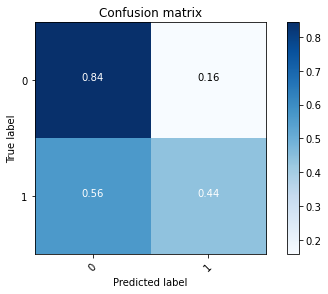

In [19]:
plot_confusion_matrix(confusion_matrix(df['target'], df['pred1_classes'], normalize='true'), [0, 1], normalize=True)

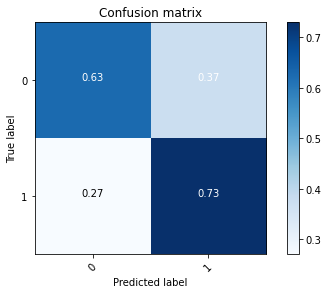

In [20]:
plot_confusion_matrix(confusion_matrix(df['target'], df['pred2_classes'], normalize='true'), [0, 1], normalize=True)

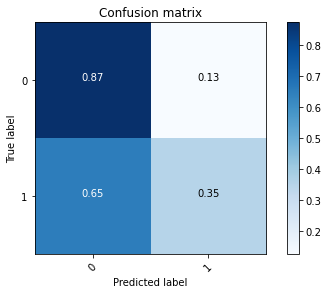

In [21]:
plot_confusion_matrix(confusion_matrix(df['target'], df['pred3_classes'], normalize='true'), [0, 1], normalize=True)

Давайте определимся с целями нашего предсказания:
    
* **Вариант 1**: хотим выдать кредит максимальному числу людей среди тех, кто мог бы его вернуть. При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того полнота должна быть как можно больше (число в левом нижнем квадрате матрицы ошибок минимально).

**Задание 5.** Для каждого алгоритма найдите такой порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной полноты можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65?

**Комментарий:** порог можно искать в цикле с небольшим шагом.

In [166]:
from sklearn.metrics import f1_score
def selection(y_true, y_pred, mm = 0.65):
    best_alpha = 0
    acc_value = 0
    max_value = 0
    metric = 'recall'
    for i in range(1, 1000):
        value = 1/i
        y_pred = (y_pred >= value).astype(bool)
        if accuracy_score(y_true, y_pred) >= mm:
            best_alpha = value
            max_value = recall_score(y_true, y_pred)
            acc_value = accuracy_score(y_true, y_pred)
            
        else:
            break
        
        return [best_alpha, metric, max_value, acc_value]
    
def selection_prec(y_true, y_pred, mm = 0.65):
    best_alpha = 0
    acc_value = 0
    max_value = 0
    metric = 'precision'
    for i in range(1, 1000):
        value = 1/i
        y_pred = (y_pred >= value).astype(bool)
        if accuracy_score(y_true, y_pred) >= mm:
            if recall_score(y_true, y_pred) > max_value:
                best_alpha = value
                max_value = precision_score(y_true, y_pred)
                acc_value = accuracy_score(y_true, y_pred)                   
            
        else:
            break
        
        return [best_alpha, metric, max_value, acc_value]

def selection_f1(y_true, y_pred, mm = 0.65):
    best_alpha = 0
    acc_value = 0
    max_value = 0
    metric = 'f1'
    for i in range(1, 1000):
        value = 1/i
        y_pred = (y_pred >= value).astype(bool)
        if accuracy_score(y_true, y_pred) >= mm:
            if recall_score(y_true, y_pred) > max_value:
                best_alpha = value
                max_value = f1_score(y_true, y_pred)
                acc_value = accuracy_score(y_true, y_pred)                    
            
        else:
            break
        
        return [best_alpha, metric, max_value, acc_value]

In [141]:
print(selection(df['target'], df['pred1_classes']))
print(selection(df['target'], df['pred2_classes']))
print(selection(df['target'], df['pred3_classes']))

[1.0, 'recall', 0.4364820846905538, 0.6618287373004355]
[1.0, 'recall', 0.7296416938110749, 0.6719883889695211]
None


**Задание 6.** Визуализируйте матрицу ошибок для каждого из трех алгоритмов с подобранным порогом.

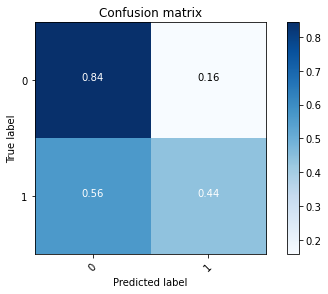

In [142]:
plot_confusion_matrix(confusion_matrix(df['target'], df['pred1_classes'] >= list(selection(df['target'], df['pred1_classes']))[0], normalize = 'true'), [0,1], normalize = True)

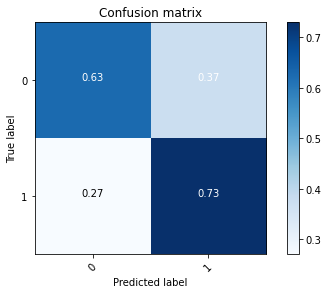

In [143]:
plot_confusion_matrix(confusion_matrix(df['target'], df['pred2_classes'] >= list(selection(df['target'], df['pred2_classes']))[0], normalize = 'true'), [0,1], normalize = True)

**Выводы:** 2 модель лучше всего справилась, рекол = 0.72

Наша цель может звучать и по-другому:
    
* **Вариант 2**: среди тех, кому модель выдает кредит, должно быть меньше всего ошибок (мало людей, кто его на самом деле не вернет - на них будем терять деньги). 
    При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того точность должна быть как можно больше (число в правом верхнем квадрате матрицы ошибок минимально).

**Задание 7.** Для каждого алгоритма найдите порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной точности можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65? 

In [144]:
print(selection_prec(df['target'], df['pred1_classes']))
print(selection_prec(df['target'], df['pred2_classes']))
print(selection_prec(df['target'], df['pred3_classes']))

[1.0, 'precision', 0.6907216494845361, 0.6618287373004355]
[1.0, 'precision', 0.6103542234332425, 0.6719883889695211]
None


**Задание 8.** Нарисуйте матрицы ошибок для каждого из алгоритмов с найденными значениями порога. Какая модель лучше всех справилась с этой задачей?

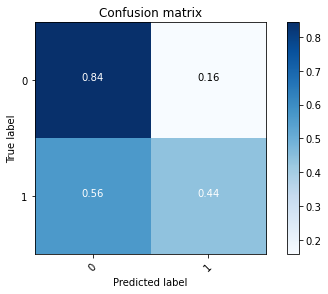

In [145]:
plot_confusion_matrix(confusion_matrix(df['target'], df['pred1_classes'] >= list(selection_prec(df['target'], df['pred1_classes']))[0], normalize = 'true'), [0,1], normalize = True)

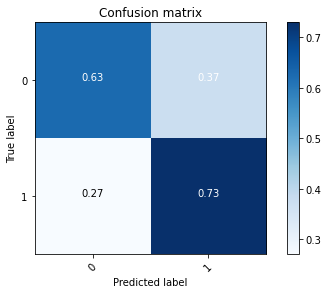

In [146]:
plot_confusion_matrix(confusion_matrix(df['target'], df['pred2_classes'] >= list(selection_prec(df['target'], df['pred2_classes']))[0], normalize = 'true'), [0,1], normalize = True)

Также (**Вариант 3**) можно потребовать, чтобы и точность, и полнота были высокими, то есть обе ошибки в матрице ошибок были маленькие. Как вариант - можно максимизировать F1-score (среднее гармоническое между точностью и полнотой).

**Задание 9.** Найдите пороги для достижения максимального F1-score для каждой из трех моделей и нарисуйте матрицы ошибок. Какая модель решает поставленную задачу лучше остальных?

In [147]:
print(selection_f1(df['target'], df['pred1_classes']))
print(selection_f1(df['target'], df['pred2_classes']))
print(selection_f1(df['target'], df['pred3_classes']))

[1.0, 'f1', 0.5349301397205589, 0.6618287373004355]
[1.0, 'f1', 0.6646884272997032, 0.6719883889695211]
None


#### Кстати

В python есть удобная функция classification_report, которая выводит значения нескольких метрик.

In [148]:
from sklearn.metrics import classification_report

print(classification_report(df['target'],df['pred1_classes']))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       382
           1       0.69      0.44      0.53       307

    accuracy                           0.66       689
   macro avg       0.67      0.64      0.63       689
weighted avg       0.67      0.66      0.65       689



### Обучим свою модель для предсказания target.

**Задание 10.** Отнормируйте признаки в задаче и обучите логистическую регрессию предсказывать target.

In [158]:
X = df.drop(columns='target')
y = df['target']

log_reg = LogisticRegression(max_iter = 100000)

StandardScaler().fit_transform(X)

log_reg.fit(X, y)
y_pred = log_reg.predict_proba(X)[:, 1]

**Задание 11.** Подберите порог для перевода предсказания в классы, чтобы максимизировать:
    а) точность 
    б) полноту 
    в) f1-score. 
Лучше ли логистическая регрессия справилась с задачей, чем три готовые модели, предсказания которых мы анализировали выше?

In [167]:
print(selection(y, y_pred, mm = 0))
print(selection_prec(y, y_pred, mm = 0))
print(selection_f1(y, y_pred, mm = 0))

[1.0, 'recall', 0.003257328990228013, 0.555878084179971]
[1.0, 'precision', 1.0, 0.555878084179971]
[1.0, 'f1', 0.006493506493506494, 0.555878084179971]


по prec, acc и f1 логрег смогла справиться лучше.